<a href="https://colab.research.google.com/github/0701Vatsal/Basic-Banking-System/blob/main/Task_1_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
THE SPARKS FOUNDATION
NAME: SHUKLA VATSAL S
DATA SCIENCE AND BUSINESS ANALYTICS TASK-1

## **Importing Libraries and Understands the Data**

In [ ]:
#import numpy and pandas and other important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [ ]:
df.head(6)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [ ]:
# Check if there  is any null value in the Dataset
df.isnull == True

False

**There is no null values in to the dataset so that now we can visualise our data**

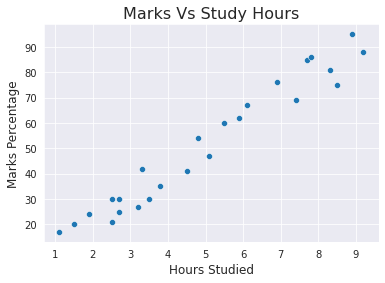

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above scatter plot there looks to be Correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the Correlation.**

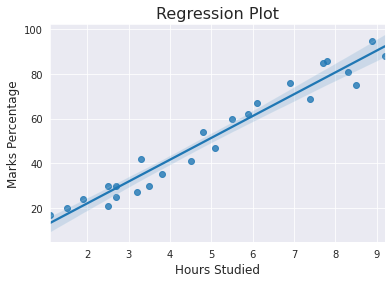

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:

sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=16)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

**It is confirmed that our Two variables are positively correlated.**



# **Now Let's Train the Model**

**1) Splitting the Data**

In [ ]:
# Defining x and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 0].values

# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

**2) Fitting the Data into Model**

In [ ]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("****Model Trained****")

****Model Trained****


# **Now Let's Predict the Percentage Of Marks**

In [ ]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,1.5
1,3.2,3.2
2,7.4,7.4
3,2.5,2.5
4,5.9,5.9
5,3.8,3.8
6,1.9,1.9


# **Comparing the Predicted Marks with Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks' : pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,1.5,1.5
1,3.2,3.2
2,7.4,7.4
3,2.5,2.5
4,5.9,5.9
5,3.8,3.8
6,1.9,1.9


# **Visually Comparing the Predicted Marks with Actual Marks**

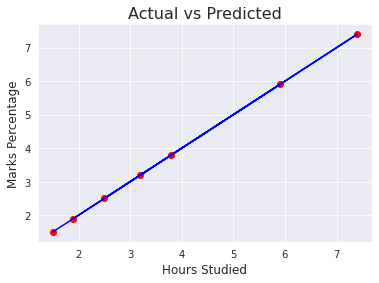

In [ ]:
plt.scatter(x=val_x, y=val_y, color='red')
plt.plot(val_x, pred_y, color='Blue')
plt.title('Actual vs Predicted', size=16)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

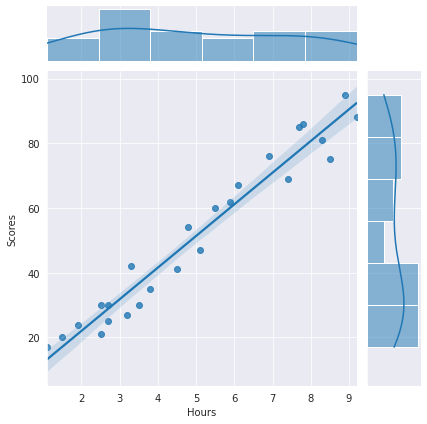

In [ ]:
sns.jointplot(x=df['Hours'], y=df['Scores'], data=df, kind='reg')

# **Evaluating the Model**

In [ ]:
# Calculating the Accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  1.2371056560108887e-15


**Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the Model are very less.**





# **Let's see What will be the Predicted score of a student if he/she Studies for 9.25 hour/day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 9.25



**According to the Regression model if a Student studies for 9.25 hours a day he/she is likely to score 93.89 Marks**